# Libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
df= pd.read_csv("C:/Users/ahria/Downloads/Export(2).csv")
df2 = pd.read_csv("C:/Users/ahria/Downloads/Export(1).csv")
df3 = pd.read_csv("C:/Users/ahria/Downloads/Export.csv")

In [3]:
df.head()

,geometry,Bed Name,Survey Date,Acres,Miles,County,Location,Start time (PDT),End time (PDT),Weather,...,Water Temp (C ) Shore Edge 2,Water Temp (C ) Water Edge 2,MLLW Tidal_Ht (m).1,Survey Conditions,Current (knots),Current Station,Averaged Temp (C) Shore Edge,Averaged Temp (C) Water Edge,Averaged Depth (m) Shore Edge,Averaged Depth (m) Water Edge
0,Geocortex.Gis.Geometries.Polygon,Clallam Bay,"Sept 2, 2023",9.584521,0.759893,Clallam,Clallam Bay,10:13 AM,10:47 AM,clear,...,NaN,NaN,NaN,We accidentally forgot to bring out the tools ...,1.0,Alan's Estimate,NaN,NaN,NaN,NaN
1,Geocortex.Gis.Geometries.Polygon,Freshwater Bay 1,"Aug 14, 2023",121.974427,4.110380,Clallam,Freshwater Bay,08:07 AM,10:20 AM,clear,...,12.8,11.1,NaN,8/14/23: It was very windy! Especially toward ...,1.0,Alan's Estimate,12.25,11.4,NaN,NaN
2,Geocortex.Gis.Geometries.Polygon,Freshwater Bay 2,"Aug 31, 2023",0.586538,0.355155,Clallam,Observatory Point,09:07 AM,09:40 AM,fog_mist,...,12.2,11.1,NaN,"@ N48°08.064, W123°38.224, a separate bed of N...",0.5,Alan's Estimate,12.75,11.1,NaN,NaN
3,Geocortex.Gis.Geometries.Polygon,Freshwater Bay 3,"Aug 31, 2023",0.315308,0.158168,Clallam,Observatory Point,09:40 AM,09:52 AM,fog_mist,...,11.1,NaN,NaN,"@ N48°08.064, W123°38.224, a separate bed of N...",0.5,Alan's Estimate,11.10,11.1,NaN,NaN
4,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,"Aug 14, 2023",31.122627,1.992345,Island,Ebey's Landing,08:10 AM,10:53 AM,clear,...,11.7,12.2,-2.34,"clear, sunny, NW wind 2 kt rising to 7 kt; cur...",NaN,on-site,11.75,12.2,-1.04,5.585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   geometry                                              41 non-null     object 
 1   Bed Name                                              41 non-null     object 
 2   Survey Date                                           41 non-null     object 
 3   Acres                                                 41 non-null     float64
 4   Miles                                                 41 non-null     float64
 5   County                                                41 non-null     object 
 6   Location                                              41 non-null     object 
 7   Start time (PDT)                                      41 non-null     object 
 8   End time (PDT)                                        40 non-n

## Explore/clean

### convert to datetime

In [5]:
df['Survey Date'] = pd.to_datetime(df['Survey Date'])
df2['Survey Date'] = pd.to_datetime(df2['Survey Date'], format='mixed')
df3['Survey Date'] = pd.to_datetime(df3['Survey Date'], format='mixed')

C:\Users\ahria\AppData\Local\Temp\ipykernel_15504\969675847.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Survey Date'] = pd.to_datetime(df['Survey Date'])


In [6]:
df['year'] = df['Survey Date'].dt.year
df2['year'] = df2['Survey Date'].dt.year
df3['year'] = df3['Survey Date'].dt.year

In [7]:
df['month'] = df['Survey Date'].dt.month
df2['month'] = df2['Survey Date'].dt.month
df3['month'] = df3['Survey Date'].dt.month

### rename columns

In [8]:
df3 = df3.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C)': "water_temp",
    }
)

In [9]:
df2 = df2.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        'Water Temp (C )': "water_temp",
    }
)

In [10]:
df = df.rename(
    columns={
        "Survey Date": "date",
        'Bed Name': 'bed_name',
        "Acres": "acres",
        "Miles": "miles",
        "County": "county",
        "Observations": "observations",
        "Water Temp (C ) Shore Edge 1": "water_temp",
    }
)

In [11]:
df3.columns

Index(['geometry', 'bed_name', 'Location', 'date', 'Survey #', 'acres',
       'miles', 'county', 'Start time (PDT)', 'End time (PDT)',
       'CORRECTED DEPTH: Edge closest to shore (m MLLW)',
       'CORRECTED DEPTH: Edge farthest from shore (m MLLW)',
       'Total Bulbs/Meter-Squared', 'water_temp', 'Weather', 'Tide Station',
       'Tide Ht Start (ft)', 'observations', 'Additional Observations',
       'Photo towards beach', 'Photo towards water', 'Photo beach on left',
       'Photo beach on right', 'SurveyDate_Converted', 'SurveyID', 'year',
       'month'],
      dtype='object')

### reduce dfs

In [12]:
df_2015= df3[['geometry','bed_name', 'date', 'acres', 'county', 'Location',
        'observations', 'water_temp','year', 'month']]

In [13]:
df_2017= df2[['geometry','bed_name', 'date', 'acres', 'county', 'Location',
        'observations', 'water_temp','year', 'month']]

In [14]:
df_2023 = df[['geometry','bed_name', 'date', 'acres', 'county', 'Location',
        'observations', 'Notes', 'water_temp','year', 'month']]

### find which ones they all share

In [51]:
sim= set(df_2017['bed_name']).intersection(set(df_2015['bed_name']))

set(df_2017['bed_name']).intersection(sim)

### looking at just ebey 

In [17]:
ebey17 = df_2017[df_2017['bed_name'] == 'Ebey\'s Landing']

In [29]:
ebey17 = ebey17.add_suffix('_17')

In [30]:
ebey15 = df_2015[df_2015['bed_name'] == 'Ebey\'s Landing']

In [31]:
ebey15 = ebey15.add_suffix('_15')

In [32]:
ebey23 = df_2023[df_2023['bed_name'] == 'Ebey\'s Landing']

In [33]:
ebey23= ebey23.add_suffix('_23')

In [35]:
frames = [ebey17, ebey15]

result = pd.concat(frames, axis=1)

result

,geometry_17,bed_name_17,date_17,acres_17,county_17,Location_17,observations_17,water_temp_17,year_17,month_17,geometry_15,bed_name_15,date_15,acres_15,county_15,Location_15,observations_15,water_temp_15,year_15,month_15
24,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-09-16,21.537306,Island,Ebey's Landing,1 sea lion cruising outer perimeter of bed 1 W...,11.0,2017.0,9.0,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-08-15,18.371846,Island,Ebeys Landing,NaN,13.0,2015.0,8.0
25,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-08-23,20.948499,Island,Ebey's Landing,"three great blue herons on kelp fishing, six h...",13.0,2017.0,8.0,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-09-26,17.885763,Island,Ebeys Landing,"Lots of heer,ams gulls, glavcous winged gulls,...",12.0,2015.0,9.0
26,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-07-25,20.160271,Island,Ebey's Landing,"2 great blue heron on kelp, one bald eagle, ma...",12.0,2017.0,7.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-06-26,14.046560,Island,Ebey's Landing,"Two common loons, one bald eagle, one great bl...",11.0,2017.0,6.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-06-14,9.490779,Island,Ebeys Landing,1) Lots (10^6) of probably kelp crab zoea in ...,11.0,2015.0,6.0
23,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2015-07-19,14.625756,Island,Ebeys Landing,NaN,13.0,2015.0,7.0


In [36]:
result= result.fillna(0)

In [38]:
result.columns

Index(['geometry_17', 'bed_name_17', 'date_17', 'acres_17', 'county_17',
       'Location_17', 'observations_17', 'water_temp_17', 'year_17',
       'month_17', 'geometry_15', 'bed_name_15', 'date_15', 'acres_15',
       'county_15', 'Location_15', 'observations_15', 'water_temp_15',
       'year_15', 'month_15'],
      dtype='object')

In [41]:
# Calculate the absolute difference in height
result['exp_diff'] = result['acres_17'] - result['acres_15']

# Calculate the percentage change
result['exp_pct'] = (result['acres_17'] / result['acres_15']) * 100

In [42]:
result

,geometry_17,bed_name_17,date_17,acres_17,county_17,Location_17,observations_17,water_temp_17,year_17,month_17,...,date_15,acres_15,county_15,Location_15,observations_15,water_temp_15,year_15,month_15,exp_diff,exp_pct
24,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-09-16 00:00:00,21.537306,Island,Ebey's Landing,1 sea lion cruising outer perimeter of bed 1 W...,11.0,2017.0,9.0,...,2015-08-15 00:00:00,18.371846,Island,Ebeys Landing,0,13.0,2015.0,8.0,3.165460,117.229949
25,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-08-23 00:00:00,20.948499,Island,Ebey's Landing,"three great blue herons on kelp fishing, six h...",13.0,2017.0,8.0,...,2015-09-26 00:00:00,17.885763,Island,Ebeys Landing,"Lots of heer,ams gulls, glavcous winged gulls,...",12.0,2015.0,9.0,3.062736,117.123876
26,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-07-25 00:00:00,20.160271,Island,Ebey's Landing,"2 great blue heron on kelp, one bald eagle, ma...",12.0,2017.0,7.0,...,0,0.000000,0,0,0,0.0,0.0,0.0,20.160271,inf
27,Geocortex.Gis.Geometries.Polygon,Ebey's Landing,2017-06-26 00:00:00,14.046560,Island,Ebey's Landing,"Two common loons, one bald eagle, one great bl...",11.0,2017.0,6.0,...,0,0.000000,0,0,0,0.0,0.0,0.0,14.046560,inf
22,0,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,2015-06-14 00:00:00,9.490779,Island,Ebeys Landing,1) Lots (10^6) of probably kelp crab zoea in ...,11.0,2015.0,6.0,-9.490779,0.000000
23,0,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,2015-07-19 00:00:00,14.625756,Island,Ebeys Landing,0,13.0,2015.0,7.0,-14.625756,0.000000


In [43]:
result[['exp_diff', 'exp_pct']].describe()

C:\Users\ahria\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:4623: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5,


,exp_diff,exp_pct
count,6.000000,6.000000
mean,2.719749,inf
std,13.287199,NaN
min,-14.625756,0.000000
25%,-6.352401,29.280969
50%,3.114098,117.176913
75%,11.326285,NaN
max,20.160271,inf


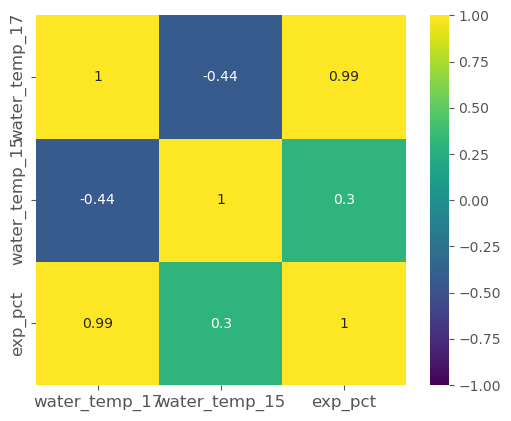

In [50]:
predictor_variables = ['water_temp_17', 'water_temp_15']

numerical_predictors = result[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = result[numerical_predictors + ["exp_pct"]].corr()


sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()